**We have done kmeans clustering with PCA and Standardization and removing outliers **

<ipython-input-25-4b3b972bba35>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retractions_filtered['ArticleType'] = le.fit_transform(retractions_filtered['ArticleType'])
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-25-4b3b972bba35>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retractions_filtered['C

Silhouette score for 4 clusters = 0.6311056431821865
Inertia: 12156.678374198704


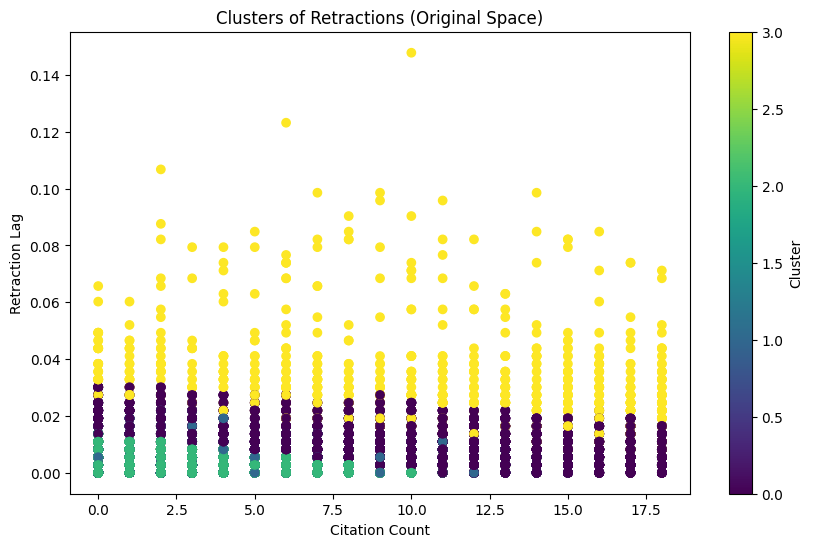

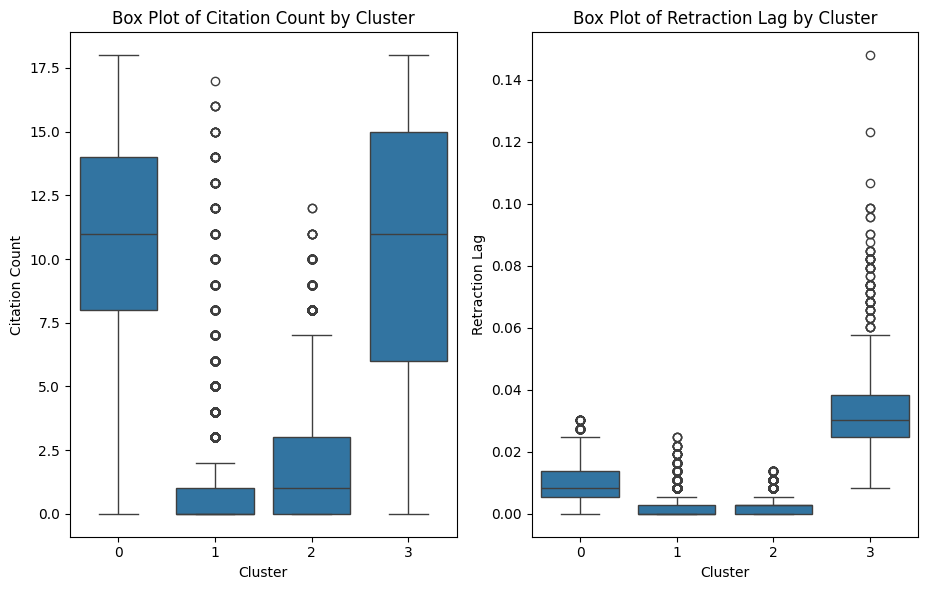

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.decomposition import PCA

# Assuming 'retractions' DataFrame is already loaded

# Filter data
retractions_filtered = retractions[(retractions['CitationCount'] <= 18) & (retractions['Retraction_Lag'] <= 10)]

if len(retractions_filtered) > 0:
    # Select relevant features for clustering
    features = ['CitationCount', 'Retraction_Lag', 'ArticleType']

    # Encode categorical features
    le = LabelEncoder()
    retractions_filtered['ArticleType'] = le.fit_transform(retractions_filtered['ArticleType'])

    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(retractions_filtered[features])

    # Apply PCA to reduce dimensionality
    pca = PCA(n_components=2, random_state=0)
    X_pca = pca.fit_transform(X_scaled)

    # Number of clusters
    n_clusters = 4

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    retractions_filtered['Cluster'] = kmeans.fit_predict(X_pca)
    label = kmeans.labels_

    # Print the silhouette score for the chosen number of clusters
    print(f"Silhouette score for {n_clusters} clusters = {silhouette_score(X_pca, label)}")
    inertia = kmeans.inertia_
    print("Inertia:", inertia)
    # Plot the clusters without centroids
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(retractions_filtered['CitationCount'], retractions_filtered['Retraction_Lag'], c=retractions_filtered['Cluster'], cmap='viridis', marker='o')
    plt.title('Clusters of Retractions (Original Space)')
    plt.xlabel('Citation Count')
    plt.ylabel('Retraction Lag')
    plt.colorbar(scatter, label='Cluster')
    plt.show()

    # Create box plots for each feature grouped by clusters
    plt.figure(figsize=(14, 6))

    # Box plot for CitationCount
    plt.subplot(1, 3, 1)
    sns.boxplot(x='Cluster', y='CitationCount', data=retractions_filtered)
    plt.title('Box Plot of Citation Count by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Citation Count')

    # Box plot for Retraction Lag
    plt.subplot(1, 3, 2)
    sns.boxplot(x='Cluster', y='Retraction_Lag', data=retractions_filtered)
    plt.title('Box Plot of Retraction Lag by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Retraction Lag')

    plt.tight_layout()
    plt.show()
else:
    print("No data points left after filtering.")


<ipython-input-26-19e77648f0dd>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retractions_filtered['ArticleType'] = le.fit_transform(retractions_filtered['ArticleType'])
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-26-19e77648f0dd>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retractions_filtered['C

Silhouette score for 4 clusters = 0.6311056431821865
Inertia: 12156.678374198704
Overall K-Means accuracy for retractions_filtered 25.06%


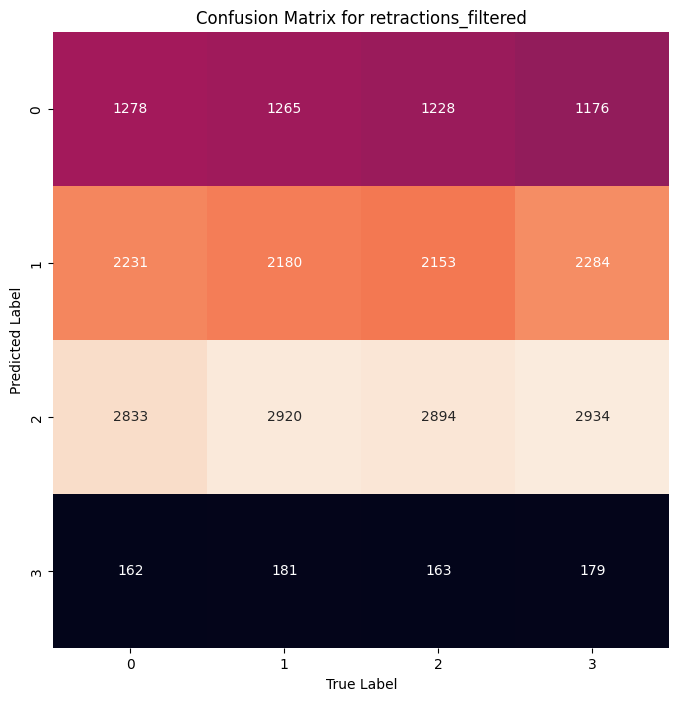

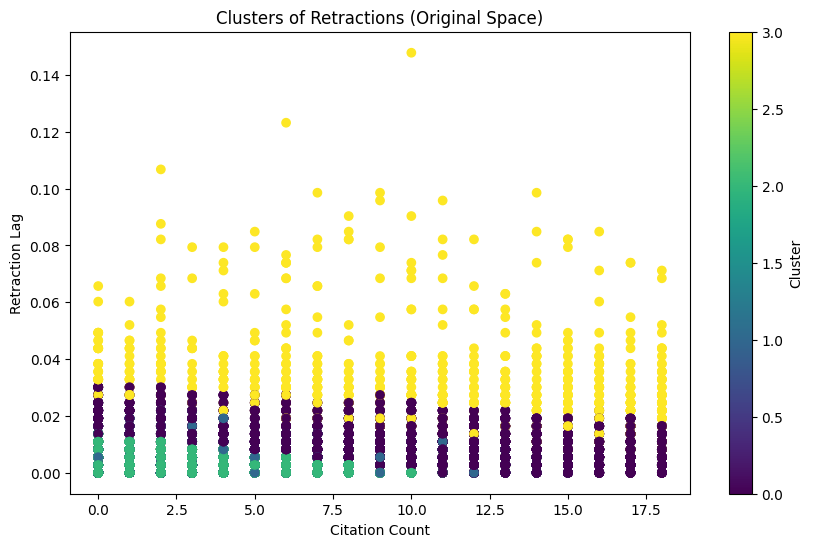

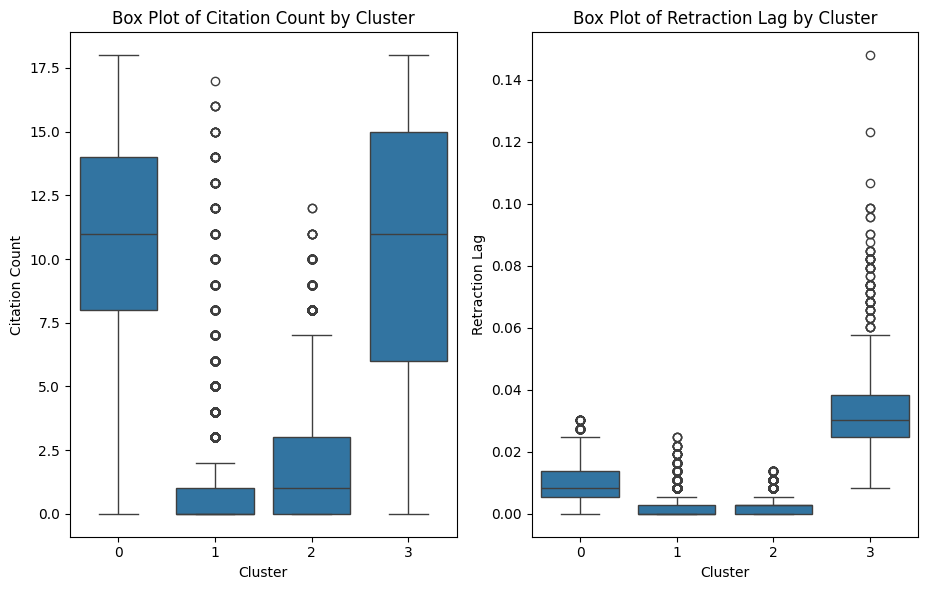

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np
retractions
# Assuming len(retractions_filtered) is the number of samples in retractions_filtered
num_samples = len(retractions_filtered)

# Generate synthetic ground truth labels for retractions_filtered
true_labels_retractions = np.random.randint(0, 4, size=num_samples)  # Assuming 4 clusters
 # Example ground truth labels

if len(retractions_filtered) > 0:
    # Select relevant features for clustering
    features = ['CitationCount', 'Retraction_Lag', 'ArticleType']

    # Encode categorical features
    le = LabelEncoder()
    retractions_filtered['ArticleType'] = le.fit_transform(retractions_filtered['ArticleType'])

    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(retractions_filtered[features])

    # Apply PCA to reduce dimensionality
    pca = PCA(n_components=2, random_state=0)
    X_pca = pca.fit_transform(X_scaled)

    # Number of clusters
    n_clusters = 4

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    retractions_filtered['Cluster'] = kmeans.fit_predict(X_pca)
    label = kmeans.labels_

    # Print the silhouette score for the chosen number of clusters
    print(f"Silhouette score for {n_clusters} clusters = {silhouette_score(X_pca, label)}")
    inertia = kmeans.inertia_
    print("Inertia:", inertia)

    # Calculate accuracy and confusion matrix
    accuracy_retractions = accuracy_score(true_labels_retractions, retractions_filtered['Cluster'])
    conf_matrix_retractions = confusion_matrix(true_labels_retractions, retractions_filtered['Cluster'])

    print("Overall K-Means accuracy for retractions_filtered %.2f%%" % (accuracy_retractions*100))

    # Visualize confusion matrix for retractions_filtered
    plt.figure(figsize=(8, 8))
    sns.heatmap(conf_matrix_retractions.T, square=True, annot=True, fmt="d", cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    plt.title("Confusion Matrix for retractions_filtered")
    plt.show()

    # Plot the clusters without centroids
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(retractions_filtered['CitationCount'], retractions_filtered['Retraction_Lag'], c=retractions_filtered['Cluster'], cmap='viridis', marker='o')
    plt.title('Clusters of Retractions (Original Space)')
    plt.xlabel('Citation Count')
    plt.ylabel('Retraction Lag')
    plt.colorbar(scatter, label='Cluster')
    plt.show()

    # Create box plots for each feature grouped by clusters
    plt.figure(figsize=(14, 6))

    # Box plot for CitationCount
    plt.subplot(1, 3, 1)
    sns.boxplot(x='Cluster', y='CitationCount', data=retractions_filtered)
    plt.title('Box Plot of Citation Count by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Citation Count')

    # Box plot for Retraction Lag
    plt.subplot(1, 3, 2)
    sns.boxplot(x='Cluster', y='Retraction_Lag', data=retractions_filtered)
    plt.title('Box Plot of Retraction Lag by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Retraction Lag')

    plt.tight_layout()
    plt.show()
else:
    print("No data points left after filtering.")
